In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

edges1 = cv2.Canny(src, 50, 100)
edges2 = cv2.Canny(src, 50, 200)
 
cv2.imshow('edges1',  edges1)
cv2.imshow('edges2',  edges2)
cv2.waitKey()
cv2.destroyAllWindows()


In [3]:

src = cv2.imread('./data/rect.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)
lines = cv2.HoughLines(edges, rho=1, theta=np.pi/180.0, threshold=100)
print('lines.shape=', lines.shape)

for line in lines:
    rho, theta   = line[0]
    c = np.cos(theta)
    s = np.sin(theta)
    x0 = c*rho
    y0 = s*rho
    x1 = int(x0 + 1000*(-s))
    y1 = int(y0 + 1000*(c))
    x2 = int(x0 - 1000*(-s))
    y2 = int(y0 - 1000*(c))
    cv2.line(src, (x1,y1), (x2,y2), (0,0,255), 2)
    
cv2.imshow('edges',  edges)
cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()


lines.shape= (4, 1, 2)


In [4]:

src = cv2.imread('./data/rect.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 50, 100)
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180.0, threshold=100)
print('lines.shape=', lines.shape)

for line in lines:
    x1, y1, x2, y2   = line[0]
    cv2.line(src,(x1,y1),(x2,y2),(0,0,255),2)
    
cv2.imshow('edges',  edges)
cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()


lines.shape= (4, 1, 4)


In [5]:

src1 = cv2.imread('./data/circles.jpg')
gray1 = cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
circles1 = cv2.HoughCircles(gray1, method = cv2.HOUGH_GRADIENT,
            dp=1, minDist=50, param2=15)

circles1 =  np.int32(circles1)
print('circles1.shape=', circles1.shape)
for circle in circles1[0,:]:    
    cx, cy, r  = circle
    cv2.circle(src1, (cx, cy), r, (0,0,255), 2)
cv2.imshow('src1',  src1)


src2 = cv2.imread('./data/circles2.jpg')
gray2 = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
circles2 = cv2.HoughCircles(gray2, method = cv2.HOUGH_GRADIENT,
          dp=1, minDist=50, param2=15, minRadius=30, maxRadius=100)

circles2 =  np.int32(circles2)
print('circles2.shape=', circles2.shape)
for circle in circles2[0,:]:    
    cx, cy, r  = circle
    cv2.circle(src2, (cx, cy), r, (0,0,255), 2) 
cv2.imshow('src2',  src2)
cv2.waitKey()
cv2.destroyAllWindows()


circles1.shape= (1, 3, 3)
circles2.shape= (1, 6, 3)


In [6]:

src1 = cv2.imread('./data/hand.jpg')
hsv1 = cv2.cvtColor(src1, cv2.COLOR_BGR2HSV)
lowerb1 = (0, 40, 0)
upperb1 = (20, 180, 255)
dst1 = cv2.inRange(hsv1, lowerb1, upperb1)


src2 = cv2.imread('./data/flower.jpg')
hsv2 = cv2.cvtColor(src2,cv2.COLOR_BGR2HSV)
lowerb2 = (150, 100, 100)
upperb2 = (180, 255, 255)
dst2 = cv2.inRange(hsv2, lowerb2, upperb2)

cv2.imshow('src1',  src1)
cv2.imshow('dst1',  dst1)
cv2.imshow('src2',  src2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


In [7]:

src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
##method =cv2.CHAIN_APPROX_NONE
contours, hierarchy = cv2.findContours(gray, mode, method)

print('type(contours)=', type(contours))
print('type(contours[0])=', type(contours[0]))
print('len(contours)=', len(contours))
print('contours[0].shape=', contours[0].shape)
print('contours[0]=', contours[0])

cv2.drawContours(src, contours, -1, (255,0,0), 3)

for pt in contours[0][:]: 
    cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0,0,255), -1)

cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()


type(contours)= <class 'tuple'>
type(contours[0])= <class 'numpy.ndarray'>
len(contours)= 1
contours[0].shape= (4, 1, 2)
contours[0]= [[[ 50 100]]

 [[ 50 400]]

 [[450 400]]

 [[450 100]]]


In [8]:

src = np.zeros(shape=(512,512,3), dtype=np.uint8)
cv2.rectangle(src, (50, 100), (450, 400), (255, 255, 255), -1)
cv2.rectangle(src, (100, 150), (400, 350), (0, 0, 0), -1)
cv2.rectangle(src, (200, 200), (300, 300), (255, 255, 255), -1)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)


mode = cv2.RETR_LIST
method = cv2.CHAIN_APPROX_SIMPLE;
contours, hierarchy = cv2.findContours(gray, mode, method)
##cv2.drawContours(src, contours, -1, (255,0,0), 3)  

print('len(contours)=', len(contours))
print('contours[0].shape=', contours[0].shape)
print('contours=', contours)

for cnt in contours:
    cv2.drawContours(src, [cnt], 0, (255,0,0), 3)
    
    for pt in cnt: 
        cv2.circle(src, (pt[0][0], pt[0][1]), 5, (0,0,255), -1)

cv2.imshow('src',  src)
cv2.waitKey()
cv2.destroyAllWindows()


len(contours)= 3
contours[0].shape= (4, 1, 2)
contours= (array([[[200, 200]],

       [[200, 300]],

       [[300, 300]],

       [[300, 200]]], dtype=int32), array([[[ 99, 150]],

       [[100, 149]],

       [[400, 149]],

       [[401, 150]],

       [[401, 350]],

       [[400, 351]],

       [[100, 351]],

       [[ 99, 350]]], dtype=int32), array([[[ 50, 100]],

       [[ 50, 400]],

       [[450, 400]],

       [[450, 100]]], dtype=int32))


In [9]:

src = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
cv2.rectangle(src, (50, 50), (200, 200), (0, 0, 255), 2)
cv2.circle(src, (300, 300), 100, (0,0,255), 2)


dst = src.copy()
cv2.floodFill(dst, mask=None, seedPoint=(100,100), newVal=(255,0,0))


retval, dst2, mask, rect=cv2.floodFill(dst, mask=None,
                          seedPoint=(300,300), newVal=(0,255,0))
print('rect=', rect)
x, y, width, height = rect
cv2.rectangle(dst2, (x,y), (x+width, y+height), (255, 0, 0), 2)

cv2.imshow('src',  src)
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


rect= (202, 202, 197, 197)


In [10]:

src = np.zeros(shape=(512,512), dtype=np.uint8)
cv2.rectangle(src, (50, 200), (450, 300), (255, 255, 255), -1)

dist  = cv2.distanceTransform(src, distanceType=cv2.DIST_L1, maskSize=3)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist)
print('src:', minVal, maxVal, minLoc, maxLoc)

dst = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
ret, dst2 = cv2.threshold(dist, maxVal-1, 255, cv2.THRESH_BINARY)

gx = cv2.Sobel(dist, cv2.CV_32F, 1, 0, ksize = 3)
gy = cv2.Sobel(dist, cv2.CV_32F, 0, 1, ksize = 3)
mag   = cv2.magnitude(gx, gy)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(mag)
print('src:', minVal, maxVal, minLoc, maxLoc)
ret, dst3 = cv2.threshold(mag, maxVal-2, 255, cv2.THRESH_BINARY_INV)

cv2.imshow('src',  src)
cv2.imshow('dst',  dst)
cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()


src: 0.0 51.0 (0, 0) (100, 250)
src: 0.0 8.0 (0, 0) (52, 200)


In [11]:

src = cv2.imread('./data/hand.jpg')
##src = cv2.imread('./data/flower.jpg')
mask   = np.zeros(shape=src.shape[:2], dtype=np.uint8)
markers= np.zeros(shape=src.shape[:2], dtype=np.int32)
dst = src.copy()
cv2.imshow('dst',dst)

def onMouse(event, x, y, flags, param):
    if event == cv2.EVENT_MOUSEMOVE:
        if flags & cv2.EVENT_FLAG_LBUTTON:
            cv2.circle(param[0], (x, y), 10, (255, 255, 255), -1)
            cv2.circle(param[1], (x, y), 10, (255, 255, 255), -1) 
    cv2.imshow('dst', param[1])    

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
while True:
    cv2.setMouseCallback('dst', onMouse, [mask, dst]) #3-1
    key = cv2.waitKey(30) 
    
    if key == 0x1B: 
        break;
    elif key == ord('r'): 
        mask[:,:] = 0        
        dst = src.copy()
        cv2.imshow('dst',dst)        
    elif key == ord(' '): 
        contours, hierarchy = cv2.findContours(mask, mode, method)
        print('len(contours)=', len(contours))
        markers[:,:] = 0  
        for i, cnt in enumerate(contours):
            cv2.drawContours(markers, [cnt], 0, i+1, -1)
        cv2.watershed(src,  markers)

        #3-4        
        dst = src.copy()
        dst[markers == -1] = [0,0,255] 
        for i in range(len(contours)):
          r = np.random.randint(256)
          g = np.random.randint(256)
          b = np.random.randint(256)
          dst[markers == i+1] = [b, g, r]

        dst = cv2.addWeighted(src, 0.4, dst, 0.6, 0)
        cv2.imshow('dst',dst)        
cv2.destroyAllWindows()


In [12]:

src = cv2.imread('./data/circles2.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 0, 255,
                                cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist  = cv2.distanceTransform(bImage, cv2.DIST_L1, 3)
dist8 = cv2.normalize(dist, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imshow('bImage',bImage)
cv2.imshow('dist8',dist8)


minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dist)
print('dist:', minVal, maxVal, minLoc, maxLoc)
mask = (dist > maxVal*0.5).astype(np.uint8)*255
cv2.imshow('mask',mask)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(mask, mode, method)
print('len(contours)=', len(contours))

markers= np.zeros(shape=src.shape[:2], dtype=np.int32)
for i, cnt in enumerate(contours):
    cv2.drawContours(markers, [cnt], 0, i+1, -1)


dst = src.copy()
cv2.watershed(src,  markers)

dst[markers == -1] = [0, 0, 255]
for i in range(len(contours)):
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[markers == i+1] = [b, g, r]
dst = cv2.addWeighted(src, 0.4, dst, 0.6, 0)     

cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()


dist: 0.0 76.0 (0, 0) (220, 220)
len(contours)= 6


In [13]:

src = cv2.imread('./data/lena.jpg')

down2 = cv2.pyrDown(src)
down4 = cv2.pyrDown(down2)
print('down2.shape=', down2.shape)
print('down2.shape=', down2.shape)

#2
up2 = cv2.pyrUp(src)
up4 = cv2.pyrUp(up2)
print('up2.shape=', up2.shape)
print('up4.shape=', up4.shape)

cv2.imshow('down2',down2)
cv2.imshow('up2',up2)
cv2.waitKey()
cv2.destroyAllWindows()


down2.shape= (256, 256, 3)
down2.shape= (256, 256, 3)
up2.shape= (1024, 1024, 3)
up4.shape= (2048, 2048, 3)


In [14]:

def floodFillPostProcess(src, diff=(2,2,2)):
    img = src.copy()
    rows, cols = img.shape[:2]
    mask   = np.zeros(shape=(rows+2, cols+2), dtype=np.uint8)
    for y in range(rows):
        for x in range(cols):
            if mask[y+1, x+1] == 0:
                r = np.random.randint(256)
                g = np.random.randint(256)
                b = np.random.randint(256)
                cv2.floodFill(img,mask,(x,y),(b,g,r),diff,diff)
    return img
src = cv2.imread('./data/flower.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
dst  = floodFillPostProcess(src)
dst2 = floodFillPostProcess(hsv)
cv2.imshow('src',src)
cv2.imshow('hsv',hsv)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2)

res = cv2.pyrMeanShiftFiltering(src, sp=5, sr=20, maxLevel=4)
dst3 = floodFillPostProcess(res)

term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 2)
res2=cv2.pyrMeanShiftFiltering(hsv,sp=5,sr=20,maxLevel=4, termcrit=term_crit)
dst4 = floodFillPostProcess(res2)

cv2.imshow('res',res)
cv2.imshow('res2',res2)
cv2.imshow('dst3',dst3)
cv2.imshow('dst4',dst4)
cv2.waitKey()
cv2.destroyAllWindows()


In [15]:

src = cv2.imread('./data/hand.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

data = src.reshape((-1,3)).astype(np.float32)

K = 2
term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
ret, labels, centers = cv2.kmeans(data, K, None, term_crit, 5,
                                  cv2.KMEANS_RANDOM_CENTERS)
print('centers.shape=', centers.shape)
print('labels.shape=', labels.shape)
print('ret=', ret)

centers = np.uint8(centers)
res   = centers[labels.flatten()]
dst  = res.reshape(src.shape)

cv2.imshow('dst',dst)
cv2.waitKey()
cv2.destroyAllWindows()


centers.shape= (2, 3)
labels.shape= (230400, 1)
ret= 62989312.60092831


In [16]:

src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret, res = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)


ret, labels = cv2.connectedComponents(res)
print('ret=', ret)


dst   = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, ret): 
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b, g, r]

cv2.imshow('res',  res)
cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


ret= 4


In [17]:

src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
ret, res = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

ret, labels, stats, centroids = cv2.connectedComponentsWithStats(res)
print('ret =', ret)
print('stats =', stats)
print('centroids =', centroids)

dst   = np.zeros(src.shape, dtype=src.dtype)
for i in range(1, int(ret)): # 분할영역 표시
    r = np.random.randint(256)
    g = np.random.randint(256)
    b = np.random.randint(256)
    dst[labels == i] = [b, g, r]
    
for i in range(1, int(ret)):
    x, y, width, height, area = stats[i]
    cv2.rectangle(dst, (x,y), (x+width, y+height), (0, 0, 255), 2)

    cx, cy = centroids[i]
    cv2.circle(dst, (int(cx), int(cy)), 5, (255,0,0), -1)
       
cv2.imshow('src',  src)
cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


ret = 4
stats = [[     0      0    512    512 222719]
 [   308     86    125    125  12281]
 [   153    145    152    152  18152]
 [   292    338    107    107   8992]]
centroids = [[247.77339607 258.80937863]
 [370.         148.        ]
 [228.5        220.50534376]
 [345.00077847 390.99477313]]


In [18]:

def findLocalMaxima(src):
    kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src,kernel) 
    localMax = (src == dilate)
    
    erode = cv2.erode(src,kernel)
    localMax2 = src > erode      
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:,[0, 1]] = points[:,[1, 0]] 
    return points

src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=3)
ret, res2 = cv2.threshold(np.abs(res), 0.1, 0, cv2.THRESH_TOZERO)
corners = findLocalMaxima(res2)
print('corners.shape=', corners.shape)

dst = src.copy()  
for x, y in corners:    
    cv2.circle(dst, (x, y), 5, (0,0,255), 2)
    
cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


corners.shape= (8, 2)


In [19]:

src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerEigenValsAndVecs(gray, blockSize=5, ksize=3)
print('res.shape=', res.shape)
eigen = cv2.split(res)

T = 0.2
ret, edge = cv2.threshold(eigen[0], T, 255, cv2.THRESH_BINARY)
edge = edge.astype(np.uint8)

corners = np.argwhere(eigen[1]>T)
corners[:,[0, 1]] = corners[:,[1, 0]]
print('len(corners) =', len(corners))

dst = src.copy()
for x, y in corners:  
    cv2.circle(dst, (x, y), 5, (0,0,255), 2)
    
cv2.imshow('edge',  edge) 
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


res.shape= (512, 512, 6)
len(corners) = 8


In [20]:

src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
eigen = cv2.cornerMinEigenVal(gray, blockSize=5)
print('eigen.shape=', eigen.shape)

T = 0.2
corners  = np.argwhere(eigen> T)
corners[:,[0, 1]] = corners[:,[1, 0]]
print('len(corners ) =', len(corners ))
dst = src.copy()
for x, y in corners :    
    cv2.circle(dst, (x, y), 3, (0,0,255), 2)
    
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


eigen.shape= (512, 512)
len(corners ) = 8


In [21]:

def findLocalMaxima(src):
    kernel= cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src,kernel)
    localMax = (src == dilate)
    
    erode = cv2.erode(src,kernel)
    localMax2 = src > erode      
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:,[0, 1]] = points[:,[1, 0]] 
    return points

src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray, blockSize=5, ksize=3, k=0.01)
ret, res = cv2.threshold(np.abs(res),0.02, 0, cv2.THRESH_TOZERO)
res8 = cv2.normalize(res, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imshow('res8',  res8)

corners = findLocalMaxima(res)
print('corners=', corners)

corners = corners.astype(np.float32, order='C')
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS, 10, 0.01)
corners2 = cv2.cornerSubPix(gray, corners,(5,5),(-1,-1), term_crit)
print('corners2=', corners2)

dst = src.copy()
for x, y in np.int32(corners2):    
    cv2.circle(dst, (x, y), 3, (0,0,255), 2)
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


corners= [[109 127]
 [264 127]
 [267 167]
 [386 170]
 [109 268]
 [167 271]
 [170 374]
 [386 374]]
corners2= [[107.559364 125.559456]
 [265.44077  125.559235]
 [265.55923  168.44174 ]
 [387.4408   168.55888 ]
 [107.558365 269.44095 ]
 [168.4415   269.55927 ]
 [168.55922  375.4408  ]
 [387.4408   375.4408  ]]


In [22]:

src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray, blockSize=5, ksize=3, k=0.01)

res = cv2.dilate(res, None) # 3x3 rect kernel
ret, res = cv2.threshold(res, 0.01*res.max(),255,cv2.THRESH_BINARY)
res8 = np.uint8(res)
cv2.imshow('res8',  res8)

ret, labels, stats, centroids = cv2.connectedComponentsWithStats(res8)
print('centroids.shape=', centroids.shape)
print('centroids=',centroids)
centroids = np.float32(centroids)

term_crit=(cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10, 0.001)
corners = cv2.cornerSubPix(gray, centroids, (5,5), (-1,-1), term_crit)
print('corners=',corners)

corners = np.round(corners)
dst = src.copy()
for x, y in corners[1:]:    
    cv2.circle(dst, (int(x), int(y)), 5, (0,0,255), 2)

cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


centroids.shape= (9, 2)
centroids= [[255.53481922 255.53107522]
 [108.         126.        ]
 [265.         126.        ]
 [266.         168.        ]
 [387.         169.        ]
 [108.         269.        ]
 [168.         270.        ]
 [169.         375.        ]
 [387.         375.        ]]
corners= [[255.53482  255.53108 ]
 [107.55841  125.55865 ]
 [265.44165  125.55835 ]
 [265.55832  168.44258 ]
 [387.44168  168.55795 ]
 [107.557495 269.44186 ]
 [168.4424   269.55838 ]
 [168.55832  375.44168 ]
 [387.44168  375.44168 ]]


In [23]:

src = cv2.imread('./data/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

K = 5 
corners = cv2.goodFeaturesToTrack(gray, maxCorners=K,
              qualityLevel=0.05, minDistance=10)
print('corners.shape=',corners.shape)
print('corners=',corners)

corners2 = cv2.goodFeaturesToTrack(gray, maxCorners=K,
               qualityLevel=0.05, minDistance=10,
               useHarrisDetector=True, k=0.04)
print('corners2.shape=',corners2.shape)
print('corners2=',corners2)

dst = src.copy()
corners = corners.reshape(-1, 2)
for x, y in corners:    
    cv2.circle(dst, (int(x), int(y)), 5, (0,0,255), -1)

corners2 = corners2.reshape(-1, 2)
for x, y in corners2:    
    cv2.circle(dst, (int(x), int(y)), 5, (255,0,0), 2)
    
cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


corners.shape= (5, 1, 2)
corners= [[[387. 375.]]

 [[169. 375.]]

 [[265. 126.]]

 [[168. 270.]]

 [[266. 168.]]]
corners2.shape= (5, 1, 2)
corners2= [[[387. 375.]]

 [[169. 375.]]

 [[265. 126.]]

 [[387. 169.]]

 [[108. 269.]]]


In [24]:

src = cv2.imread('./data/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
patternSize = (6, 3)
found, corners = cv2.findChessboardCorners(src, patternSize)
print('corners.shape=', corners.shape)

term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 0.01)
corners2 = cv2.cornerSubPix(gray, corners, (5,5), (-1,-1), term_crit)

dst = src.copy()
cv2.drawChessboardCorners(dst, patternSize, corners2, found)

cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


corners.shape= (18, 1, 2)


In [25]:

src = cv2.imread('./data/circleGrid.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
patternSize = (6, 4)
found, centers = cv2.findCirclesGrid(src, patternSize)
print('centers.shape=', centers.shape)

term_crit=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER, 10, 0.01)
centers2 = cv2.cornerSubPix(gray, centers, (5,5), (-1,-1), term_crit)

dst = src.copy()
cv2.drawChessboardCorners(dst, patternSize, centers2, found)

cv2.imshow('dst',  dst) 
cv2.waitKey()
cv2.destroyAllWindows()


centers.shape= (24, 1, 2)


In [26]:

src = cv2.imread('./data/momentTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)


M = cv2.moments(bImage, True)
for key, value in M.items():
    print('{}={}'.format(key, value))
    
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
dst = src.copy()
cv2.circle(dst, (cx, cy), 5, (0,0,255), 2)

cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


m00=79262.0
m10=19719561.0
m01=19943644.0
m20=5515429769.0
m11=5090506179.0
m02=5490383844.0
m30=1678594806585.0
m21=1448966367859.0
m12=1427069177889.0
m03=1619623824694.0
mu20=609408144.1012974
mu11=128735034.94252014
mu02=472229671.77704334
mu30=3184447093.48999
mu21=-2863822758.3268433
mu12=-3664976429.7761536
mu03=509725524.1086426
nu20=0.09700144427924574
nu11=0.020491167437841
nu02=0.07516630789606452
nu30=0.001800410227810075
nu21=-0.0016191368967214139
nu12=-0.002072090022265142
nu03=0.00028818662079742156


In [27]:

src = cv2.imread('./data/circles.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(bImage, mode, method)

dst = src.copy()
cv2.drawContours(dst, contours, -1, (255,0,0), 3)

for cnt in contours:
    M = cv2.moments(cnt, True)
    cx = int(M['m10']/M['m00'])
    cy = int(M['m01']/M['m00'])
    cv2.circle(dst, (cx, cy), 5, (0,0,255), 2)

cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [28]:

src = cv2.imread('./data/momentTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(bImage, mode, method)

dst = src.copy()
cnt = contours[0]
cv2.drawContours(dst, [cnt], 0, (255,0,0), 3)

M = cv2.moments(cnt)
hu = cv2.HuMoments(M)
print('hu.shape=', hu.shape)
print('hu=', hu)

angle = 45.0
scale = 0.2
cx = M['m10']/M['m00']
cy = M['m01']/M['m00']
center = (cx, cy)
t = (20, 30)
A = cv2.getRotationMatrix2D( center, angle, scale )
A[:, 2] += t
print('A=', A)

cnt2 = cv2.transform(cnt, A)
cv2.drawContours(dst, [cnt2], 0, (0,255,0), 3)
cv2.imshow('dst',  dst)

M2 = cv2.moments(cnt2)
hu2 = cv2.HuMoments(M2)
print('hu2.shape=', hu2.shape)
print('hu2=', hu)

diffSum = np.sum(cv2.absdiff(hu, hu2))
print('diffSum=', diffSum)

cv2.waitKey()
cv2.destroyAllWindows()


hu.shape= (7, 1)
hu= [[ 1.72272960e-01]
 [ 2.17960438e-03]
 [ 9.24428655e-05]
 [ 1.90785217e-06]
 [ 1.11977849e-12]
 [-6.96325160e-09]
 [-2.53121609e-11]]
A= [[ 1.41421356e-01  1.41421356e-01  1.98030817e+02]
 [-1.41421356e-01  1.41421356e-01  2.81234993e+02]]
hu2.shape= (7, 1)
hu2= [[ 1.72272960e-01]
 [ 2.17960438e-03]
 [ 9.24428655e-05]
 [ 1.90785217e-06]
 [ 1.11977849e-12]
 [-6.96325160e-09]
 [-2.53121609e-11]]
diffSum= 0.0003215707378081359


In [29]:

src = cv2.imread('./data/banana.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
bImage = cv2.dilate(bImage, None)
cv2.imshow('bImage',  bImage)

mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(bImage, mode, method)
print('len(contours)=', len(contours))

maxLength = 0
k = 0
for i, cnt in enumerate(contours):
    perimeter = cv2.arcLength(cnt, closed = True)
    if perimeter> maxLength:
        maxLength = perimeter
        k = i
print('maxLength=', maxLength)
cnt = contours[k]
dst2 = src.copy()
cv2.drawContours(dst2, [cnt], 0, (255,0,0), 3)

area = cv2.contourArea(cnt)
print('area=', area)
x, y, width, height = cv2.boundingRect(cnt)
dst3 = dst2.copy()
cv2.rectangle(dst3, (x, y), (x+width, y+height), (0,0,255), 2)
cv2.imshow('dst3',  dst3)

rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int32(box)
print('box=', box)
dst4 = dst2.copy()
cv2.drawContours(dst4,[box],0,(0,0,255),2)
cv2.imshow('dst4',  dst4)

(x,y),radius = cv2.minEnclosingCircle(cnt)
dst5 = dst2.copy()
cv2.circle(dst5,(int(x),int(y)),int(radius),(0,0,255),2)
cv2.imshow('dst5',  dst5)

cv2.waitKey()
cv2.destroyAllWindows()


len(contours)= 1
maxLength= 936.0630499124527
area= 24663.0
box= [[ 48 147]
 [159  44]
 [386 288]
 [275 391]]


In [30]:

src = cv2.imread('./data/banana.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, bImage = cv2.threshold(gray, 220, 255, cv2.THRESH_BINARY_INV)
##bImage = cv2.erode(bImage, None)
bImage = cv2.dilate(bImage, None)


mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(bImage, mode, method)

dst = src.copy()
cnt = contours[0]
cv2.drawContours(dst, [cnt], 0, (255,0,0), 3)

dst2 = dst.copy()
rows,cols = dst2.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2, 0, 0.01, 0.01)
y1 =  int((-x*vy/vx) + y)
y2 = int(((cols-x)*vy/vx)+y)
cv2.line(dst2,(0,y1), (cols-1,y2),(0,0,255), 2)
cv2.imshow('dst2',  dst2)

ellipse = cv2.fitEllipse(cnt)
dst3 = dst.copy()
cv2.ellipse(dst3, ellipse,(0,0,255),2)
cv2.imshow('dst3',  dst3)

poly = cv2.approxPolyDP(cnt, epsilon=20, closed=True)
dst4 = dst.copy()
cv2.drawContours(dst4, [poly], 0, (0,0,255), 2)
cv2.imshow('dst4',  dst4)

dst5 = dst.copy()
for y in range(rows):
    for x in range(cols):
        if cv2.pointPolygonTest(cnt, (x, y), False)>0:
            dst5[y, x] = (0, 255, 0)            
cv2.imshow('dst5',  dst5)

cv2.waitKey()
cv2.destroyAllWindows()


In [31]:

src = cv2.imread('./data/hand.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lowerb = (0, 40, 0)
upperb = (20, 180, 255)
bImage = cv2.inRange(hsv, lowerb, upperb)

mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(bImage, mode, method)

dst = src.copy()
cnt = contours[0]
cv2.drawContours(dst, [cnt], 0, (255,0,0), 2)

dst2 = dst.copy()
rows,cols = dst2.shape[:2]
hull = cv2.convexHull(cnt)
cv2.drawContours(dst2, [hull], 0, (0,0,255), 2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()
cv2.destroyAllWindows()


In [32]:

src = cv2.imread('./data/hand.jpg')
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
lowerb = (0, 40, 0)
upperb = (20, 180, 255)
bImage = cv2.inRange(hsv, lowerb, upperb)

mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
contours, hierarchy = cv2.findContours(bImage, mode, method)

dst = src.copy()
cnt = contours[0]
cv2.drawContours(dst, [cnt], 0, (255,0,0), 2)

dst2 = dst.copy()
rows,cols = dst2.shape[:2]
hull = cv2.convexHull(cnt, returnPoints = False)
hull_points = cnt[hull[:,0]]
cv2.drawContours(dst2, [hull_points], 0, (255,0,255), 6)

T = 5 # 10
defects = cv2.convexityDefects(cnt, hull)
print('defects.shape=',defects.shape)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    dist = d/256
    start = tuple(cnt[s][0])
    end   = tuple(cnt[e][0])
    far   = tuple(cnt[f][0])    
    if dist > T:
        cv2.line(dst2,start,end,[255,255,0],2)
        cv2.line(dst2,start,far,[0,255,0],1)
        cv2.line(dst2,end,  far,[0,255,0],1)
        
        cv2.circle(dst2,start,5,[0,255,255],-1)
        cv2.circle(dst2,end,  5,[0,128,255],-1)
        cv2.circle(dst2,far,  5,[0,0,255],-1)   
cv2.imshow('dst2',  dst2)

cv2.waitKey()
cv2.destroyAllWindows()


defects.shape= (25, 1, 4)


In [33]:

ref_src  = cv2.imread('./data/refShapes.jpg')
ref_gray = cv2.cvtColor(ref_src, cv2.COLOR_BGR2GRAY)
ret, ref_bin = cv2.threshold(ref_gray, 0, 255,
                             cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

test_src  = cv2.imread('./data/testShapes1.jpg')
test_gray = cv2.cvtColor(test_src, cv2.COLOR_BGR2GRAY)
ret, test_bin = cv2.threshold(test_gray, 0, 255,
                             cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
mode   = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
ref_contours, _ = cv2.findContours(ref_bin, mode, method)
test_contours, _ = cv2.findContours(test_bin, mode, method)

ref_dst = ref_src.copy()
colors = ((0,0,255), (0,255,0), (255,0,0))
for i, cnt in enumerate(ref_contours):
    cv2.drawContours(ref_dst, [cnt], 0, colors[i], 2)

test_dst = test_src.copy()
method = cv2.CONTOURS_MATCH_I1    
for i, cnt1 in enumerate(test_contours):
    matches = []
    for cnt2 in ref_contours:
        ret = cv2.matchShapes(cnt1, cnt2, method, 0)
        matches.append(ret)
    k = np.argmin(matches)
    cv2.drawContours(test_dst, [cnt1], 0, colors[k], 2)
       
cv2.imshow('ref_dst',  ref_dst)
cv2.imshow('test_dst', test_dst)

cv2.waitKey()
cv2.destroyAllWindows()


In [34]:
A = np.arange(1, 17).reshape(4, 4).astype(np.uint8)
print('A=', A)

sumA, sqsumA, tiltedA = cv2.integral3(A)
print('sumA=', sumA)
print('sqsumA=', np.uint32(sqsumA))
print('tiltedA=', tiltedA)


A= [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
sumA= [[  0   0   0   0   0]
 [  0   1   3   6  10]
 [  0   6  14  24  36]
 [  0  15  33  54  78]
 [  0  28  60  96 136]]
sqsumA= [[   0    0    0    0    0]
 [   0    1    5   14   30]
 [   0   26   66  124  204]
 [   0  107  247  426  650]
 [   0  276  612 1016 1496]]
tiltedA= [[ 0  0  0  0  0]
 [ 0  1  2  3  4]
 [ 1  8 12 16 15]
 [ 8 26 38 42 36]
 [26 60 80 84 70]]


In [35]:

gray = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

gray_sum = cv2.integral(gray)
dst = cv2.normalize(gray_sum, None, 0, 255,
                    cv2.NORM_MINMAX, dtype=cv2.CV_8U)
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


In [36]:

def rectSum(sumImage, rect):
    x, y, w, h = rect
    a = sumImage[y, x]
    b = sumImage[y, x+w]
    c = sumImage[y+h, x]
    d = sumImage[y+h, x+w]
    return a + d - b - c

def compute_Haar_feature1(sumImage, rect):
    x, y, w, h = rect
    s1 = rectSum(sumImage, (x,  y, w, h))
    s2 = rectSum(sumImage, (x+w,y, w, h)) 
    return s1-s2
def compute_Haar_feature2(sumImage, rect):
    x, y, w, h = rect
    s1 = rectSum(sumImage, (x,  y, w, h))
    s2 = rectSum(sumImage, (x,y+h, w, h)) 
    return s2-s1
def compute_Haar_feature3(sumImage, rect):
    x, y, w, h = rect
    s1 = rectSum(sumImage, (x,    y, w, h))
    s2 = rectSum(sumImage, (x+w,  y, w, h))
    s3 = rectSum(sumImage, (x+2*w,y, w, h))
    return s1-s2+s3
def compute_Haar_feature4(sumImage, rect):
    x, y, w, h = rect
    s1 = rectSum(sumImage, (x,    y,  w, h))
    s2 = rectSum(sumImage, (x,  y+h,  w, h))
    s3 = rectSum(sumImage, (x,  y+2*h,w, h))
    return s1-s2+s3
def compute_Haar_feature5(sumImage, rect):
    x, y, w, h = rect
    s1 = rectSum(sumImage, (x,    y, w, h))
    s2 = rectSum(sumImage, (x+w,  y, w, h))
    s3 = rectSum(sumImage, (x,  y+h, w, h))
    s4 = rectSum(sumImage, (x+w,y+h, w, h))
    return s1+s4-s2-s3

A = np.arange(1, 6*6+1).reshape(6, 6).astype(np.uint8)
print('A=', A)

h, w = A.shape
sumA = cv2.integral(A)
print('sumA=', sumA)

f1 = compute_Haar_feature1(sumA, (0, 0, w//2, h))    # 3, 6
print('f1=', f1)

f2 = compute_Haar_feature2(sumA, (0, 0, w, h//2))    # 6, 3
print('f2=', f2)

f3 = compute_Haar_feature3(sumA, (0, 0, w//3, h))    # 2, 6
print('f3=', f3)

f4 = compute_Haar_feature4(sumA, (0, 0, w, h//3))    # 6, 2
print('f4=', f4)

f5 = compute_Haar_feature5(sumA, (0, 0, w//2, h//2)) # 3, 3
print('f5=', f5)


A= [[ 1  2  3  4  5  6]
 [ 7  8  9 10 11 12]
 [13 14 15 16 17 18]
 [19 20 21 22 23 24]
 [25 26 27 28 29 30]
 [31 32 33 34 35 36]]
sumA= [[  0   0   0   0   0   0   0]
 [  0   1   3   6  10  15  21]
 [  0   8  18  30  44  60  78]
 [  0  21  45  72 102 135 171]
 [  0  40  84 132 184 240 300]
 [  0  65 135 210 290 375 465]
 [  0  96 198 306 420 540 666]]
f1= -54
f2= 324
f3= 222
f4= 222
f5= 0


In [37]:
def rectSum(sumImage, rect):
    x, y, w, h = rect
    a = sumImage[y, x]
    b = sumImage[y, x + w]
    c = sumImage[y + h, x]
    d = sumImage[y + h, x + w]
    return a + d - b - c
def compute_Haar_feature1(sumImage):
    rows, cols = sumImage.shape
    rows -= 1
    cols -= 1
    f1 = []
    for y in range(0, rows):
        for x in range(0, cols):
            for h in range(1, rows - y + 1):
                for w in range(1, (cols - x) // 2 + 1):
                    s1 = rectSum(sumImage, (x, y, w, h))
                    s2 = rectSum(sumImage, (x + w, y, w, h))
                    f1.append([1, x, y, w, h, s1-s2])    
    return f1
def compute_Haar_feature2(sumImage):
    rows, cols = sumImage.shape
    rows -= 1
    cols -= 1
    f2 = []
    for y in range(0, rows):
        for x in range(0, cols):
            for h in range(1, (rows - y) // 2 + 1):
                for w in range(1, cols - x + 1):
                    s1 = rectSum(sumImage, (x, y, w, h))
                    s2 = rectSum(sumImage, (x, y + h, w, h))
                    f2.append([2, x, y, w, h, s2 - s1])    
    return f2
def compute_Haar_feature3(sumImage):
    rows, cols = sumImage.shape
    rows -= 1
    cols -= 1
    f3 = []
    for y in range(0, rows):
        for x in range(0, cols):
            for h in range(1, rows - y + 1):
                for w in range(1, (cols - x) // 3 + 1):
                    s1 = rectSum(sumImage, (x, y, w, h))
                    s2 = rectSum(sumImage, (x + w, y, w, h))
                    s3 = rectSum(sumImage, (x + 2 * w, y, w, h))                    
                    f3.append([3, x, y, w, h, s1 - s2 + s3])    
    return f3
def compute_Haar_feature4(sumImage):
    rows, cols = sumImage.shape
    rows -= 1
    cols -= 1
    f4 = []
    for y in range(0, rows):
        for x in range(0, cols):
            for h in range(1, (rows - y) // 3 + 1):
                for w in range(1, cols - x + 1):
                    s1 = rectSum(sumImage, (x, y, w, h))
                    s2 = rectSum(sumImage, (x, y + h, w, h))
                    s3 = rectSum(sumImage, (x, y + 2 * h, w, h))
                    f4.append([4, x, y, w, h, s1- s2 + s3])    
    return f4
def compute_Haar_feature5(sumImage):
    rows, cols = sumImage.shape
    rows -= 1
    cols -= 1
    f5 = []
    for y in range(0, rows):
        for x in range(0, cols):
            for h in range(1, (rows - y) // 2 + 1):
                for w in range(1, (cols - x) // 2 + 1):
                    s1 = rectSum(sumImage, (x, y, w, h))
                    s2 = rectSum(sumImage, (x + w, y, w, h))
                    s3 = rectSum(sumImage, (x, y + h, w, h))
                    s4 = rectSum(sumImage, (x + w, y + h, w, h))
                    f5.append([5, x, y, w, h, s1 - s2 - s3 + s4])    
    return f5

gray = cv2.imread('./data/lenaFace24.jpg', cv2.IMREAD_GRAYSCALE)  # 24 x 24
gray_sum = cv2.integral(gray)
f1 = compute_Haar_feature1(gray_sum)
n1 = len(f1)
print('len(f1)=', n1)
for i, a in enumerate(f1[:2]):
    print('f1[{}]={}'.format(i, a))
f2 = compute_Haar_feature2(gray_sum)
n2 = len(f2)
print('len(f2)=', n2)
for i, a in enumerate(f2[:2]):
    print('f2[{}]={}'.format(i, a))

f3 = compute_Haar_feature3(gray_sum)
n3 = len(f3)
print('len(f3)=', n3)
for i, a in enumerate(f3[:2]):
    print('f3[{}]={}'.format(i, a))

f4 = compute_Haar_feature4(gray_sum)
n4 = len(f4)
print('len(f4)=', n4)
for i, a in enumerate(f4[:2]):
    print('f4[{}]={}'.format(i, a))
f5 = compute_Haar_feature5(gray_sum)
n5 = len(f5)
print('len(f5)=', n5)
for i, a in enumerate(f5[:2]):
    print('f5[{}]={}'.format(i, a))
    
print('total features =', n1 + n2 + n3 + n4 + n5)


len(f1)= 43200
f1[0]=[1, 0, 0, 1, 1, -11]
f1[1]=[1, 0, 0, 2, 1, 6]
len(f2)= 43200
f2[0]=[2, 0, 0, 1, 1, 25]
f2[1]=[2, 0, 0, 2, 1, 6]
len(f3)= 27600
f3[0]=[3, 0, 0, 1, 1, 138]
f3[1]=[3, 0, 0, 2, 1, 324]
len(f4)= 27600
f4[0]=[4, 0, 0, 1, 1, 170]
f4[1]=[4, 0, 0, 2, 1, 373]
len(f5)= 20736
f5[0]=[5, 0, 0, 1, 1, -44]
f5[1]=[5, 0, 0, 2, 1, 25]
total features = 162336


In [38]:
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)


fastF =cv2.FastFeatureDetector.create(threshold=30) # 100
kp = fastF.detect(gray) 
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))
print('len(kp)=', len(kp))
cv2.imshow('dst',  dst)

fastF.setNonmaxSuppression(False)
kp2 = fastF.detect(gray)
dst2 = cv2.drawKeypoints(src, kp2, None, color=(0,0,255))
print('len(kp2)=', len(kp2))
cv2.imshow('dst2',  dst2)

dst3 = src.copy()
points = cv2.KeyPoint_convert(kp)
points = np.int32(points)

for cx, cy in points:
    cv2.circle(dst3, (cx, cy), 3, color=(255, 0, 0), thickness=1)
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 98
len(kp2)= 867


In [39]:

src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

fastF = cv2.FastFeatureDetector_create()
kp = fastF.detect(gray) 
dst = cv2.drawKeypoints(gray, kp, None, color=(255,0,0))
print('len(kp)=', len(kp))

kp = sorted(kp, key=lambda f: f.response, reverse=True)
cv2.drawKeypoints(gray, kp[:10], dst, color=(0,0,255),
                 flags = cv2.DRAW_MATCHES_FLAGS_DRAW_OVER_OUTIMG)
cv2.imshow('dst',  dst)

kp2 = list(filter(lambda f: f.response>50, kp))
print('len(kp2)=', len(kp2))

dst2 = cv2.drawKeypoints(gray, kp2, None, color=(0,0,255))   
cv2.imshow('dst2',  dst2)

def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) 
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: 
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])

kp3 = filteringByDistance(kp2, 30)
print('len(kp3)=', len(kp3))
dst3 = cv2.drawKeypoints(gray, kp3, None, color=(0,0,255))
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 167
len(kp2)= 91
len(kp3)= 38


In [40]:

src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

mserF = cv2.MSER_create(10)  # cv2.MSER.create(10)
kp= mserF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))
cv2.imshow('dst',  dst)

dst2 = dst.copy()
regions, bboxes = mserF.detectRegions(gray)
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
cv2.polylines(dst2, hulls, True, (0, 255, 0))
cv2.imshow('dst2',  dst2)

dst3 = dst.copy()
for i, pts in enumerate(regions):
    box = cv2.fitEllipse(pts)
    cv2.ellipse(dst3, box,  (255,0,0),1)
    x, y, w, h = bboxes[i]
    cv2.rectangle(dst3, (x, y), (x+w, y+h), (0,255,0))     
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 202


In [41]:

src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

params = cv2.SimpleBlobDetector_Params()
params.blobColor = 0
params.thresholdStep = 5
params.minThreshold = 20
params.maxThreshold = 100
params.minDistBetweenBlobs = 5
params.filterByArea = True
params.minArea = 25
params.maxArea = 5000
params.filterByConvexity = True
params.minConvexity = 0.89


blobF = cv2.SimpleBlobDetector_create()
kp= blobF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))

for f in kp:
    r = int(f.size/2)
    cx, cy = f.pt
    cv2.circle(dst, (round(cx),round(cy)),r,(0,0,255),2)
    
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 14


In [42]:

src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)


goodF = cv2.GFTTDetector_create()
kp= goodF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)


goodF2 = cv2.GFTTDetector_create(maxCorners= 50,
                                qualityLevel=0.1,
                                minDistance = 10,
                                useHarrisDetector=True)
kp2= goodF2.detect(gray)
print('len(kp2)=', len(kp2))
dst2 = cv2.drawKeypoints(gray, kp2, None, color=(0,0,255))   
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 114
len(kp2)= 38


In [43]:

def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])


src = cv2.imread('./data/cornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

orbF = cv2.ORB_create(scoreType=1)
kp= orbF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)


kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response>50, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = orbF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)


dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 63
len(filtered_kp)= 8
des.shape= (8, 32)
des= [[ 72  48  56  96  33  77  81  16 105 168  52   8 159  23  64  50 132 213
  221   8 137  96 240   0 195 249  33  48  66 128  71  51]
 [104  48  56  96  33  77  81  16 105 168  52   8 159  23  64  50 132 212
   93   8 136  96 240   0 195 217  33  48  66 128  66  35]
 [  2 141   2 158  20 131 174 230  22   0  90   2  96 234  48  64 121 106
   19 193   2 186   8 255  40  38 138 128  21  14  48 136]
 [  2 141   2 158  20 131 174 230  22   0  88   2  32 234  48  64 121 106
   19 193   2 186  10 255  40  38 138 136  21  14  48 136]
 [  2 141   2 158  20 131 174 230  22   1  88   2  32 234  48  64 121 106
   19 193   2 186   8 255  40  38 138 128  21  14  48 136]
 [  2 141   2 158  20 131 174 230  22   0  90   2  96 234  48  64 121 106
   19 193   2 186  10 255  40  38 138 128  21  14 176 136]
 [  2 140   2 155  84 131 170 238  22   1  88   2  96 232  56  64 121 106
   19 129  34 186  10 255  40  38 155 136  21  10  48 136]
 [  2 141   2

In [44]:

def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

fastF = cv2.FastFeatureDetector_create(threshold=30)
mserF = cv2.MSER_create(10)
blobF = cv2.SimpleBlobDetector_create()
goodF = cv2.GFTTDetector_create(maxCorners= 20,minDistance = 10)

kp= fastF.detect(gray)

print('len(kp)=', len(kp))

filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))
dst = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

#3
orbF = cv2.ORB_create()
filtered_kp, des = orbF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 90
len(filtered_kp)= 38
des.shape= (38, 32)
des= [[ 14 156 176 ...  68 141 199]
 [ 15  65  83 ... 179 113 164]
 [ 14 152 176 ...  69  13 206]
 ...
 [114 186 226 ... 200 246 139]
 [ 57  15 231 ... 232 240  49]
 [242 164 218 ... 200 242 138]]


In [45]:

def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    

src = cv2.imread('./data/cornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

briskF = cv2.BRISK_create()
kp= briskF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = list(filter(lambda f: f.response>50, kp))
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = briskF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 27
len(filtered_kp)= 8
des.shape= (8, 64)
des= [[254 191 247 241 112   0   0   0 193 199  31 255 240 195  14  48 248  96
  133  51 140 227  16   6   0   0  32 227  25  39  60 225   0   1   0   0
    0   3 128  80 198  25   3   0   0   0   0   0   0  96  50  63 143 195
  193 195 225 115 120 125  27  13   0   0]
 [248 255 255 247 243 224   0   0   0 134  31 255 255 255 254 243 143 127
  252 253 143 255  61 142 131   3   0   0   0 108 252 227  15  29 240 128
    7 220 254 128 135  16  18  49  51   6   0   0 218 239  50  17   0  12
    0   8   0 130  64  32   0   0   0   0]
 [128 251 255 231 225   0   0   0   0   0   0   0   0 199  61 255 255 255
  205  35  12   0   0   0   0   0   0   0   0   0 112 231  57 239 252 243
  159  61 195  24 198   0   0   0   0   0   0   0   0 128 247 247 255  85
   78   0 144 107  96   0   0   0   0   0]
 [128 255 207 227   0   0   0   0   0   0   0 224 112 199 255 255 191 249
  192   1   0   0   0   0   0   0   0   0   0   0   0 128  25 127 254 185
 

In [46]:

def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    
src = cv2.imread('./data/chessBoard.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

fastF = cv2.FastFeatureDetector_create(threshold=30)
mserF = cv2.MSER_create(10)
blobF = cv2.SimpleBlobDetector_create()
goodF = cv2.GFTTDetector_create(maxCorners= 20,minDistance = 10)

kp= fastF.detect(gray)
print('len(kp)=', len(kp))

filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))
dst = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

briskF = cv2.BRISK_create()
filtered_kp, des = briskF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des=', des)

dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 90
len(filtered_kp)= 38
des.shape= (38, 64)
des= [[252 255 239 ... 141  25  50]
 [252 255 255 ... 141  25   0]
 [252 255 239 ... 141  25  50]
 ...
 [252 255 239 ... 141 153   2]
 [252 255 255 ...  13 136 137]
 [252 255 239 ... 141 153  50]]


In [47]:

def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8) # all True   
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    

src = cv2.imread('./data/cornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0.0)

kazeF = cv2.KAZE_create()
akazeF = cv2.AKAZE_create()
kp= kazeF.detect(gray)
print('len(kp)=', len(kp))
dst = cv2.drawKeypoints(gray, kp, None, color=(0,0,255))   
cv2.imshow('dst',  dst)

kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = kazeF.compute(gray, filtered_kp)
##kp, des =akazeF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des.dtype=', des.dtype)
print('des=', des)

dst2 = cv2.drawKeypoints(gray, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst2, [box], True, (0,255,0), 2)
    cv2.circle(dst2, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 24
len(filtered_kp)= 8
des.shape= (8, 64)
des.dtype= float32
des= [[ 1.14232790e-09  1.11133824e-09  1.14232790e-09  1.11133824e-09
   6.20288483e-06  9.53687631e-05  1.58439780e-05  9.53687631e-05
  -5.25308224e-06  6.70127192e-05  9.62024933e-06  6.70127192e-05
  -1.70022304e-07  1.03006232e-06  1.70022304e-07  1.03006232e-06
   1.03421044e-04  1.90313112e-05  1.03421058e-04  1.90313112e-05
   1.34724930e-01  1.52200282e-01  1.51440144e-01  1.52200282e-01
  -2.30528787e-02  3.74734521e-01  8.76285210e-02  3.74734521e-01
  -3.42215709e-02  2.07327902e-01  3.42215709e-02  2.07327902e-01
  -1.74935609e-02  1.16855837e-01  1.99715067e-02  1.16855837e-01
   3.92313182e-01  1.39286309e-01  4.04346526e-01  1.39286309e-01
   4.40635756e-02  1.34092659e-01  8.16987529e-02  1.34092659e-01
  -2.09586024e-02  1.26975477e-01  2.09586024e-02  1.26975477e-01
  -2.04016007e-02  1.28629118e-01  2.08908170e-02  1.28629118e-01
   7.47088864e-02  1.11985192e-01  9.21307057e-02  1.11985192e-01
 

In [48]:

def distance(f1, f2):    
    x1, y1 = f1.pt
    x2, y2 = f2.pt
    return np.sqrt((x2 - x1)**2+ (y2 - y1)**2)

def filteringByDistance(kp, distE=0.5):
    size = len(kp)
    mask = np.arange(1,size+1).astype(np.bool8)  
    for i, f1 in enumerate(kp):
        if not mask[i]:
            continue
        else: # True
            for j, f2 in enumerate(kp):
                if i == j:
                    continue
                if distance(f1, f2)<distE:
                    mask[j] = False
    np_kp = np.array(kp)
    return list(np_kp[mask])
    

src = cv2.imread('./data/cornerTest.jpg')
gray= cv2.cvtColor(src,cv2.COLOR_BGR2GRAY)

siftF = cv2.SIFT_create(edgeThreshold = 80)

kp= siftF.detect(gray)
print('len(kp)=', len(kp))

kp = sorted(kp, key=lambda f: f.response, reverse=True)
filtered_kp = filteringByDistance(kp, 10)
print('len(filtered_kp)=', len(filtered_kp))

kp, des = siftF.compute(gray, filtered_kp)
print('des.shape=', des.shape)
print('des.dtype=', des.dtype)
print('des=', des)

dst = cv2.drawKeypoints(src, filtered_kp, None, color=(0,0,255))  
for f in filtered_kp:
    x, y = f.pt
    size = f.size
    rect = ((x, y), (size, size), f.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(dst, [box], True, (0,255,0), 2)
    cv2.circle(dst, (round(x), round(y)), round(f.size/2), (255,0,0), 2)
cv2.imshow('dst',  dst)
cv2.waitKey()
cv2.destroyAllWindows()


len(kp)= 26
len(filtered_kp)= 14
des.shape= (14, 128)
des.dtype= float32
des= [[  0.   0.   0. ...   0.   0.   0.]
 [  2.  12.   7. ...   0.   0.   1.]
 [  0.   0.   0. ...   0.   0.   1.]
 ...
 [  9.  30. 152. ...   0.   0.   0.]
 [  2.  24. 164. ...   0.   0.   0.]
 [  3. 112. 160. ...   0.   0.   0.]]


In [49]:
  
src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)


orbF   = cv2.ORB_create(nfeatures=1000)
kp1, des1 = orbF.detectAndCompute(img1, None)
kp2, des2 = orbF.detectAndCompute(img2, None)

bf = cv2.BFMatcher_create(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda m: m.distance)
print('len(matches)=', len(matches))
for i, m in enumerate(matches[:3]):
        print('matches[{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(
            i, m. queryIdx, m.trainIdx, m.distance))

minDist = matches[0].distance
good_matches = list(filter(lambda m: m.distance<5*minDist, matches))
print('len(good_matches)=', len(good_matches))
if len(good_matches) < 5:
    print('sorry, too small good matches')
    exit()
    
dst = cv2.drawMatches(img1,kp1,img2,kp2,good_matches, None, flags=2)
cv2.imshow('dst',  dst)

src1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 3.0)#cv2.LMEDS
mask_matches = mask.ravel().tolist() # list(mask.flatten())

h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0, 0),2)
        
draw_params=dict(matchColor = (0,255,0), singlePointColor = None,
                 matchesMask = mask_matches,  flags = 2)                 
dst2 = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,**draw_params)  
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(matches)= 340
matches[0]=(queryIdx:310, trainIdx:215, distance:10.0)
matches[1]=(queryIdx:413, trainIdx:328, distance:12.0)
matches[2]=(queryIdx:355, trainIdx:127, distance:15.0)
len(good_matches)= 182


In [50]:

src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

siftF = cv2.SIFT_create()
kp1, des1 = siftF.detectAndCompute(img1, None)
kp2, des2 = siftF.detectAndCompute(img2, None)

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k = 2)


print('len(matches)=', len(matches))
for i, m in enumerate(matches[:3]):
    for j, n in enumerate(m):
        print('matches[{}][{}]=(queryIdx:{}, trainIdx:{}, distance:{})'.format(
            i, j, n. queryIdx, n.trainIdx, n.distance))
dst = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,flags=0)

nndrRatio = 0.45
good_matches = [f1 for f1, f2 in matches
                   if f1.distance < nndrRatio*f2.distance]


print('len(good_matches)=', len(good_matches))
if len(good_matches) < 5:
    print('sorry, too small good matches')
    exit()

src1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 2.0)#cv2.LMEDS
mask_matches = mask.ravel().tolist() # list(mask.flatten())

h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0, 0),2)
        
draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = None,
                   matchesMask = mask_matches, flags = 2)                 
dst2 = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,**draw_params)
cv2.imshow('dst2',  dst2)
cv2.waitKey()
cv2.destroyAllWindows()


len(matches)= 597
matches[0][0]=(queryIdx:0, trainIdx:198, distance:305.919921875)
matches[0][1]=(queryIdx:0, trainIdx:541, distance:317.4192810058594)
matches[1][0]=(queryIdx:1, trainIdx:542, distance:297.1666259765625)
matches[1][1]=(queryIdx:1, trainIdx:467, distance:302.2664489746094)
matches[2][0]=(queryIdx:2, trainIdx:403, distance:383.37841796875)
matches[2][1]=(queryIdx:2, trainIdx:196, distance:404.24249267578125)
len(good_matches)= 136


In [51]:
src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)

siftF = cv2.SIFT_create()
kp1, des1 = siftF.detectAndCompute(img1, None)
kp2, des2 = siftF.detectAndCompute(img2, None)

print('len(kp1)=', len(kp1))
print('len(kp2)=', len(kp2))

flan = cv2.FlannBasedMatcher_create() 
matches = flan.radiusMatch(des1,des2, maxDistance=50) # 200
print('# of matches =', len(np.nonzero(np.array(matches, dtype=object))[0]))

def draw_key2image(kp, img):
    x, y = kp.pt
    size = kp.size
    rect = ((x, y), (size, size), kp.angle)
    box = cv2.boxPoints(rect).astype(np.int32)
    cv2.polylines(img, [box], True, (0,255,0), 2)
    cv2.circle(img, (round(x), round(y)), round(size/2), (255,0,0), 2)
    
for i, radius_match in enumerate(matches):
    if len(radius_match) != 0:
        print('i=', i)
        print('len(matches[{}])={}'.format(i,len(matches[i])))
        src1c = src1.copy()
        draw_key2image(kp1[radius_match[0].queryIdx], src1c)
        src2c = src2.copy()
        for m in radius_match:
            draw_key2image(kp2[m.trainIdx], src2c)    
        dst = cv2.drawMatches(src1c,kp1,src2c,kp2,radius_match, None,flags=2)
        cv2.imshow('dst',  dst)
        cv2.waitKey()
cv2.waitKey()
cv2.destroyAllWindows()


len(kp1)= 597
len(kp2)= 881
# of matches = 8
i= 124
len(matches[124])=1
i= 156
len(matches[156])=1
i= 157
len(matches[157])=1
i= 240
len(matches[240])=1
i= 282
len(matches[282])=1
i= 353
len(matches[353])=1
i= 435
len(matches[435])=1
i= 506
len(matches[506])=1


In [52]:

src1 = cv2.imread('./data/book1.jpg')
src2 = cv2.imread('./data/book2.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)
img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)


siftF = cv2.SIFT_create()
kp1, des1 = siftF.detectAndCompute(img1, None)
kp2, des2 = siftF.detectAndCompute(img2, None)
print('len(kp1)={}, len(kp2)={}'.format(len(kp1), len(kp2)))


distT = 200 # 500
flan = cv2.FlannBasedMatcher_create() 
matches = flan.radiusMatch(des1,des2,  maxDistance=distT)
print('len(matches)=', len(matches))
        

good_matches = []
for i, radius_match in enumerate(matches):
    if len(radius_match) != 0:
        for m in radius_match:
            if m.distance<100: # filter by distance
                good_matches.append(m)

print('len(good_matches)=', len(good_matches))

src1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches])
src2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches])

H, mask = cv2.findHomography(src1_pts, src2_pts, cv2.RANSAC, 3.0)#cv2.LMEDS
mask_matches = mask.ravel().tolist() # list(mask.flatten())

h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
pts2 = cv2.perspectiveTransform(pts, H)
src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0, 0),2)
        
draw_params=dict(matchColor = (0,255,0), singlePointColor = None,
                 matchesMask = mask_matches,  flags = 2)                 
dst3 = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,**draw_params)
cv2.imshow('dst3',  dst3)

cv2.waitKey()
cv2.destroyAllWindows()


len(kp1)=597, len(kp2)=881
len(matches)= 597
len(good_matches)= 88


HOG feature size =  3780
des1.shape= (3780,)
des2.shape= (3780,)
des3.shape= (3780,)
des4.shape= (3780,)


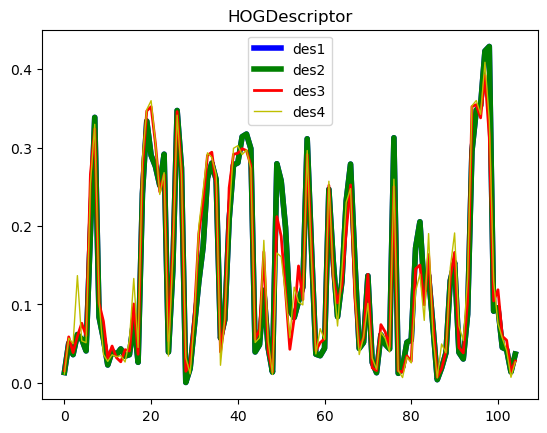

In [53]:

src = cv2.imread('./data/people1.png')
hog1 = cv2.HOGDescriptor()
des1 = hog1.compute(src)
print("HOG feature size = ",  hog1.getDescriptorSize())
print('des1.shape=', des1.shape)

hog2 = cv2.HOGDescriptor(_winSize=(64, 128),
                         _blockSize=(16,16),
                         _blockStride=(8,8),
                         _cellSize=(8,8),
                         _nbins=9,
                         _derivAperture=1,
                         _winSigma= -1,
                         _histogramNormType=0,
                         _L2HysThreshold=0.2,
                         _gammaCorrection=True,
                         _nlevels=64,
                         _signedGradient=False)

des2 = hog2.compute(src)
print('des2.shape=', des2.shape)

hog3 = cv2.HOGDescriptor(_winSize=(64, 128),
                         _blockSize=(16,16),
                         _blockStride=(8,8),
                         _cellSize=(8,8),
                         _nbins=9)   # _gammaCorrection=False
des3 = hog3.compute(src)
print('des3.shape=', des3.shape)

#4 HOG in grayscale image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
des4 = hog3.compute(gray)
print('des4.shape=', des4.shape)

plt.title('HOGDescriptor')
plt.plot(des1[::36], color='b',linewidth=4,label='des1')
plt.plot(des2[::36], color='g',linewidth=4,label='des2')
plt.plot(des3[::36], color='r',linewidth=2,label='des3')
plt.plot(des4[::36], color='y',linewidth=1,label='des4')
plt.legend(loc='best')
plt.show()


In [54]:
src = cv2.imread('./data/people.png')
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())  # 64x128


loc1, weights1 = hog.detect(src)
print('len(loc1)=',len(loc1))
dst1 = src.copy()
w, h = hog.winSize
for pt in loc1:
    x, y = pt
    cv2.rectangle(dst, (x, y), (x+w, y+h), (255,0,0),2)
cv2.imshow('dst1',  dst1)

dst2 = src.copy()
loc2, weights2 = hog.detectMultiScale(src)
print('len(loc2)=',len(loc2))
for rect in loc2:
    x, y, w, h = rect
    cv2.rectangle(dst2, (x, y), (x+w, y+h), (0,255,0),2)
cv2.imshow('dst2',  dst2)

dst3 = src.copy()
loc3, weights3 = hog.detectMultiScale(src, winStride=(1,1), padding=(8,8))
print('len(loc3)=',len(loc3))
print('weights3=', weights3)
for i, rect in enumerate(loc3):
    x, y, w, h = rect
    if weights3[i]>0.5:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (0,0,255),2)
    else:
        cv2.rectangle(dst3, (x, y), (x+w, y+h), (255,0,0),2)
    
cv2.imshow('dst3',  dst3)
cv2.waitKey()
cv2.destroyAllWindows()


len(loc1)= 0
len(loc2)= 3
len(loc3)= 6
weights3= [3.82788086 2.49923777 2.40610975 1.13816954 0.64257281 0.37325616]


In [56]:
src1 = cv2.imread('./data/stitch_image1.jpg')
src2 = cv2.imread('./data/stitch_image2.jpg')
src3 = cv2.imread('./data/stitch_image3.jpg')
src4 = cv2.imread('./data/stitch_image4.jpg')


stitcher = cv2.Stitcher.create()
status, dst2 = stitcher.stitch((src1, src2))
status, dst3 = stitcher.stitch((dst2, src3))
status, dst4 = stitcher.stitch((dst3, src4))

cv2.imshow('dst2',  dst2)
cv2.imshow('dst3',  dst3)
cv2.imshow('dst4',  dst4)
cv2.waitKey()
cv2.destroyAllWindows()


In [57]:
cap = cv2.VideoCapture('./data/stitch_videoInput.mp4')
t = 0 
images = []
STEP = 20
while True:
    t += 1
    retval, frame = cap.read()
    if not retval:
        break
    img = cv2.resize(frame, dsize=(640, 480)) 
    if t%STEP == 0:
        images.append(img)
        
    cv2.imshow('img',img)
    key = cv2.waitKey(25)
    if key == 27: 
        break
print('len(images)=', len(images))
stitcher = cv2.Stitcher.create()

status, dst = stitcher.stitch(images)
if status == cv2.STITCHER_OK:
    cv2.imwrite('./data/video_stitch_out.jpg', dst)
    cv2.imshow('dst',dst)
    cv2.waitKey()

if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()


len(images)= 0


In [58]:
cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
              int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

acc_gray= np.zeros(shape=(height, width), dtype=np.float32)
acc_bgr = np.zeros(shape=(height, width, 3), dtype=np.float32)
t = 0

while True:
    ret, frame = cap.read()
    if not ret:
        break
    t += 1
    print('t =', t)   
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.accumulate(gray, acc_gray)
    avg_gray = acc_gray/t       
    dst_gray = cv2.convertScaleAbs(avg_gray)

    cv2.accumulate(frame, acc_bgr)
    avg_bgr = acc_bgr/t       
    dst_bgr= cv2.convertScaleAbs(avg_bgr)
    
    cv2.imshow('frame',frame)
    cv2.imshow('dst_gray',dst_gray)
    cv2.imshow('dst_bgr',dst_bgr)    
    key = cv2.waitKey(20)
    if key == 27:
        break
if cap.isOpened(): cap.release()
cv2.imwrite('./data/avg_gray.png', dst_gray)
cv2.imwrite('./data/avg_bgr.png', dst_bgr)
cv2.destroyAllWindows()


t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17


In [59]:
cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
              int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

TH      = 40  # binary threshold
AREA_TH = 80 # area   threshold 
bkg_gray= cv2.imread('./data/avg_gray.png', cv2.IMREAD_GRAYSCALE)
bkg_bgr = cv2.imread('./data/avg_bgr.png')

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE

t = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t+=1
    print('t =', t)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    

    diff_gray  = cv2.absdiff(gray, bkg_gray)   
    diff_bgr = cv2.absdiff(frame, bkg_bgr)      
    db, dg, dr = cv2.split(diff_bgr)
    ret, bb = cv2.threshold(db,TH,255,cv2.THRESH_BINARY)
    ret, bg = cv2.threshold(dg,TH,255,cv2.THRESH_BINARY)
    ret, br = cv2.threshold(dr,TH,255,cv2.THRESH_BINARY)
 
    bImage = cv2.bitwise_or(bb, bg)
    bImage = cv2.bitwise_or(br, bImage)
      
    bImage = cv2.erode(bImage, None, 5)
    bImage = cv2.dilate(bImage,None, 5)    
    bImage = cv2.erode(bImage, None, 7)
    
    contours, hierarchy = cv2.findContours(bImage, mode, method)
    cv2.drawContours(frame, contours, -1, (255,0,0), 1)   
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > AREA_TH:
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0,0,255), 2)
    
    cv2.imshow('frame',frame)
    cv2.imshow('bImage',bImage)
    cv2.imshow('diff_gray',diff_gray)
    cv2.imshow('diff_bgr',diff_bgr)
    key = cv2.waitKey(25)
    if key == 27:
        break
if cap.isOpened():
    cap.release();
cv2.destroyAllWindows()


t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10


In [60]:

cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                 int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

TH      = 40  # binary threshold
AREA_TH = 80 # area   threshold 
acc_bgr = np.zeros(shape=(height, width, 3), dtype=np.float32)

mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE

t = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t+=1
    print("t = ", t)
    blur = cv2.GaussianBlur(frame,(5,5),0.0)

    if t < 50:
        cv2.accumulate(blur, acc_bgr)
        continue
    elif t == 50:
        bkg_bgr = acc_bgr/t

    diff_bgr = np.uint8(cv2.absdiff(np.float32(blur), bkg_bgr))
    db,dg,dr = cv2.split(diff_bgr)
    ret, bb = cv2.threshold(db,TH,255,cv2.THRESH_BINARY)
    ret, bg = cv2.threshold(dg,TH,255,cv2.THRESH_BINARY)
    ret, br = cv2.threshold(dr,TH,255,cv2.THRESH_BINARY)
    bImage = cv2.bitwise_or(bb, bg)
    bImage = cv2.bitwise_or(br, bImage)
    bImage = cv2.erode(bImage,None, 5)
    bImage = cv2.dilate(bImage,None,5)    
    bImage = cv2.erode(bImage,None, 7)
    cv2.imshow('bImage',bImage)
    msk = bImage.copy()
    contours, hierarchy = cv2.findContours(bImage, mode, method)
    cv2.drawContours(frame, contours, -1, (255,0,0), 1)   
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > AREA_TH:
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0,0,255), 2)
            cv2.rectangle(msk, (x, y), (x+width, y+height), 255, -1) 
    msk = cv2.bitwise_not(msk)
    cv2.accumulateWeighted(blur,bkg_bgr, alpha=0.1,mask=msk)

    cv2.imshow('frame',frame)
    cv2.imshow('bkg_bgr',np.uint8(bkg_bgr))    
    cv2.imshow('diff_bgr',diff_bgr)
    key = cv2.waitKey(25)
    if key == 27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()


t =  1
t =  2
t =  3
t =  4
t =  5
t =  6
t =  7
t =  8
t =  9
t =  10
t =  11
t =  12
t =  13
t =  14
t =  15
t =  16
t =  17
t =  18
t =  19
t =  20
t =  21
t =  22
t =  23
t =  24
t =  25
t =  26
t =  27
t =  28
t =  29
t =  30
t =  31
t =  32
t =  33
t =  34
t =  35
t =  36
t =  37
t =  38
t =  39
t =  40
t =  41
t =  42
t =  43
t =  44
t =  45
t =  46
t =  47
t =  48
t =  49
t =  50
t =  51
t =  52
t =  53
t =  54
t =  55
t =  56
t =  57
t =  58
t =  59
t =  60
t =  61
t =  62
t =  63
t =  64
t =  65
t =  66
t =  67
t =  68
t =  69
t =  70
t =  71
t =  72
t =  73
t =  74
t =  75
t =  76
t =  77


In [61]:

cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                 int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))


bgMog1 = cv2.createBackgroundSubtractorMOG2()
bgMog2 = cv2.createBackgroundSubtractorMOG2(varThreshold=25,
                                            detectShadows=False)
bgKnn1 = cv2.createBackgroundSubtractorKNN()
bgKnn2 = cv2.createBackgroundSubtractorKNN(dist2Threshold=1000,
                                           detectShadows=False)


AREA_TH = 80 # area   threshold
def findObjectAndDraw(bImage, src):
    res = src.copy()
    bImage = cv2.erode(bImage,None, 5)
    bImage = cv2.dilate(bImage,None,5)    
    bImage = cv2.erode(bImage,None, 7)    
    contours, _ = cv2.findContours(bImage,
                      cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(src, contours, -1, (255,0,0), 1)
    for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > AREA_TH:
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(res, (x, y), (x+width, y+height), (0,0,255), 2)
    return res

t = 0
while True:
    ret, frame = cap.read()
    if not ret:
        break
    t+=1
    print('t =', t)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(frame,(5,5),0.0)


    bImage1 = bgMog1.apply(blur)
    bImage2 = bgMog2.apply(blur)
    bImage3 = bgKnn1.apply(blur)
    bImage4 = bgKnn2.apply(blur)
    dst1 = findObjectAndDraw(bImage1, frame)
    dst2 = findObjectAndDraw(bImage2, frame)
    dst3 = findObjectAndDraw(bImage3, frame)
    dst4 = findObjectAndDraw(bImage4, frame)

    cv2.imshow('bImage1',bImage1)
    cv2.imshow('bgMog1',dst1)
    cv2.imshow('bImage2',bImage2)
    cv2.imshow('bgMog2',dst2)
    cv2.imshow('bImage3',bImage3)
    cv2.imshow('bgKnn1',dst3)
    cv2.imshow('bImage4',bImage4)
    cv2.imshow('bgKnn2',dst4)
    key = cv2.waitKey(25) #0
    if key == 27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()


t = 1
t = 2
t = 3
t = 4
t = 5
t = 6
t = 7
t = 8
t = 9
t = 10
t = 11
t = 12
t = 13
t = 14
t = 15
t = 16
t = 17


In [62]:
roi  = None
drag_start = None
mouse_status = 0
tracking_start  = False
def onMouse(event, x, y, flags, param=None):
     global roi
     global drag_start
     global mouse_status
     global tracking_start   
     if event == cv2.EVENT_LBUTTONDOWN:
          drag_start = (x, y)
          mouse_status = 1
          tracking_start = False
     elif event == cv2.EVENT_MOUSEMOVE:
          if flags == cv2.EVENT_FLAG_LBUTTON:
               xmin = min(x, drag_start[0])
               ymin = min(y, drag_start[1])
               xmax = max(x, drag_start[0])
               ymax = max(y, drag_start[1])
               roi = (xmin, ymin, xmax, ymax)
               mouse_status = 2 # dragging
     elif event == cv2.EVENT_LBUTTONUP:
          mouse_status = 3 # complete
      
cv2.namedWindow('tracking')
cv2.setMouseCallback('tracking', onMouse)

cap = cv2.VideoCapture('./data/checkBoard3x3.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                 int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
roi_mask   = np.zeros((height, width), dtype=np.uint8)

params = dict(maxCorners=16,qualityLevel=0.001,minDistance=10,blockSize=5)
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10,0.01)
params2 = dict(winSize= (5,5), maxLevel = 3, criteria =  term_crit)


t = 0
while True:
     ret, frame = cap.read()
     if not ret: break
     t+=1
     print('t=',t)
     imgC = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     imgC = cv2.GaussianBlur(imgC, (5, 5), 0.5)

     if mouse_status==2:
          x1, y1, x2, y2 = roi
          cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 0, 255), 2)
         
     if mouse_status==3:
          print('initialize....')
          mouse_status = 0
          x1, y1, x2, y2 = roi
          roi_mask[:,:] = 0
          roi_mask[y1:y2, x1:x2] = 1
          p1 = cv2.goodFeaturesToTrack(imgC,mask=roi_mask,**params)
          if len(p1)>=4:
               p1 = cv2.cornerSubPix(imgC, p1, (5,5),(-1,-1), term_crit)
               rect = cv2.minAreaRect(p1)
               box_pts = cv2.boxPoints(rect).reshape(-1,1,2)
               tracking_start = True
             
     if tracking_start:
          p2,st,err= cv2.calcOpticalFlowPyrLK(imgP,imgC,p1,None,**params2)
          p1r,st,err=cv2.calcOpticalFlowPyrLK(imgC,imgP,p2,None,**params2)
          d = abs(p1-p1r).reshape(-1, 2).max(-1)
          stat = d < 1.0  # 1.0 is distance threshold
          good_p2 = p2[stat==1].copy()
          good_p1 = p1[stat==1].copy()
          
          for x, y in good_p2.reshape(-1, 2):
               cv2.circle(frame, (int(x), int(y)), 3, (0,0,255), -1)
                
          if len(good_p2)<4:
               continue
          H, mask = cv2.findHomography(good_p1, good_p2, cv2.RANSAC, 3.0)
          box_pts = cv2.perspectiveTransform(box_pts, H)
          cv2.polylines(frame,[np.int32(box_pts)],True,(255,0, 0),2)
          p1 = good_p2.reshape(-1,1,2)


     cv2.imshow('tracking',frame)
     imgP = imgC.copy()
     key = cv2.waitKey(25)
     if key == 27:
          break
if cap.isOpened():
     cap.release();
cv2.destroyAllWindows()


t= 1
t= 2
t= 3
t= 4
t= 5
t= 6
t= 7
t= 8
t= 9
t= 10
t= 11
t= 12
t= 13
t= 14
t= 15
t= 16
t= 17
t= 18
t= 19
t= 20
t= 21
t= 22
t= 23
t= 24
t= 25
t= 26
t= 27
t= 28
t= 29
t= 30
t= 31
t= 32
t= 33
t= 34
t= 35
t= 36
t= 37
t= 38
t= 39
t= 40
t= 41
t= 42
t= 43
t= 44
t= 45
t= 46
t= 47
t= 48
t= 49
t= 50
t= 51
t= 52
t= 53
t= 54
t= 55
t= 56
t= 57
t= 58
t= 59
t= 60
t= 61
t= 62
t= 63
t= 64
t= 65
t= 66
t= 67
t= 68
t= 69
t= 70
t= 71
t= 72
t= 73
t= 74
t= 75
t= 76
t= 77
t= 78
t= 79
t= 80
t= 81
t= 82
t= 83
t= 84
t= 85
t= 86
t= 87
t= 88
t= 89
t= 90
t= 91
t= 92
t= 93
t= 94
t= 95
t= 96
t= 97
t= 98
t= 99
t= 100
t= 101
t= 102
t= 103
t= 104
t= 105
t= 106
t= 107
t= 108
t= 109
t= 110
t= 111
t= 112
t= 113
t= 114
t= 115
t= 116
t= 117
t= 118
t= 119
t= 120
t= 121
t= 122
t= 123
t= 124
t= 125
t= 126
t= 127
t= 128
t= 129
t= 130
t= 131
t= 132
t= 133
t= 134
t= 135
t= 136
t= 137
t= 138
t= 139
t= 140
t= 141
t= 142
t= 143
t= 144
t= 145
t= 146
t= 147
t= 148
t= 149
t= 150
t= 151
t= 152
t= 153
t= 154
t= 155
t= 156
t= 157
t= 158
t=

In [63]:

def drawFlow(img, flow, thresh=2, stride=8):
     h, w = img.shape[:2]
     mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
     flow2 = np.int32(flow)
     for y in range(0,h,stride):
          for x in range(0,w,stride):
               dx, dy = flow2[y,x]
               if mag[y,x] > thresh:
                    cv2.circle(img, (x, y), 2, (0,255,0), -1)
                    cv2.line(img, (x, y), (x+dx, y+dy),(255, 0, 0), 1)
   
cap = cv2.VideoCapture('./data/vtest.avi')
if (not cap.isOpened()): 
     print('Error opening video')
     
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                 int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))

hsv = np.zeros((height, width, 3), dtype=np.uint8)

ret, frame = cap.read()
imgP = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

TH = 2
AREA_TH = 50
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
params = dict(pyr_scale=0.5, levels=3, winsize=15,
              iterations=3, poly_n=5, poly_sigma=1.2, flags=0)

t = 0
while True:
     ret, frame = cap.read()
     if not ret: break
     t+=1
     print('t=',t)
     imgC = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
     imgC = cv2.GaussianBlur(imgC, (5, 5), 0.5)

     flow = cv2.calcOpticalFlowFarneback(imgP,imgC,None, **params)
     drawFlow(frame, flow, TH)

   
     mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])      
     ret, bImage = cv2.threshold(mag,TH,255,cv2.THRESH_BINARY)
     bImage = bImage.astype(np.uint8)
     contours, hierarchy = cv2.findContours(bImage, mode, method)
     for i, cnt in enumerate(contours):
        area = cv2.contourArea(cnt)
        if area > AREA_TH:
            x, y, width, height = cv2.boundingRect(cnt)
            cv2.rectangle(frame, (x, y), (x+width, y+height), (0,0,255), 2)

     cv2.imshow('frame',frame)
     imgP = imgC.copy()
     key = cv2.waitKey(25)
     if key == 27:
          break
if cap.isOpened():
    cap.release();
cv2.destroyAllWindows()


t= 1
t= 2
t= 3
t= 4
t= 5
t= 6
t= 7
t= 8
t= 9


In [64]:

roi  = None
drag_start = None
mouse_status = 0
tracking_start  = False
def onMouse(event, x, y, flags, param=None):
     global roi
     global drag_start
     global mouse_status
     global tracking_start   
     if event == cv2.EVENT_LBUTTONDOWN:
          drag_start = (x, y)
          mouse_status = 1
          tracking_start = False
     elif event == cv2.EVENT_MOUSEMOVE:
          if flags == cv2.EVENT_FLAG_LBUTTON:
               xmin = min(x, drag_start[0])
               ymin = min(y, drag_start[1])
               xmax = max(x, drag_start[0])
               ymax = max(y, drag_start[1])
               roi = (xmin, ymin, xmax, ymax)
               mouse_status = 2 # dragging
     elif event == cv2.EVENT_LBUTTONUP:
          mouse_status = 3 # complete
         
cv2.namedWindow('tracking')
cv2.setMouseCallback('tracking', onMouse)

cap = cv2.VideoCapture('./data/ball.wmv')
if (not cap.isOpened()): 
     print('Error opening video')    
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                 int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
roi_mask   = np.zeros((height, width), dtype=np.uint8)
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10, 1)

t = 0
while True:
     ret, frame = cap.read()
     if not ret: break
     t+=1
     print('t=',t)

     frame2 = frame.copy() # CamShift
     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
     mask = cv2.inRange(hsv, (0., 60., 32.),(180., 255., 255.))

     if mouse_status==2:
          x1, y1, x2, y2 = roi
          cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)

     if mouse_status==3:
          print('initialize....')
          mouse_status = 0
          x1, y1, x2, y2 = roi
          mask_roi = mask[y1:y2, x1:x2]
          hsv_roi  =  hsv[y1:y2, x1:x2]
          
          hist_roi = cv2.calcHist([hsv_roi],[0],mask_roi,[16],[0,180])
          cv2.normalize(hist_roi,hist_roi,0,255,cv2.NORM_MINMAX)
          track_window1 = (x1, y1, x2-x1, y2-y1) # meanShift
          track_window2 = (x1, y1, x2-x1, y2-y1) # CamShift
          tracking_start = True
               
     if tracking_start:
          backP = cv2.calcBackProject([hsv],[0],hist_roi,[0,180],1)
          backP &= mask
          cv2.imshow('backP',backP)
          
          ret, track_window1 = cv2.meanShift(backP, track_window1, term_crit)
          x,y,w,h = track_window1
          cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255),2)

          track_box, track_window2=cv2.CamShift(backP, track_window2, term_crit)         
          x,y,w,h = track_window2
          cv2.rectangle(frame2, (x,y), (x+w,y+h), (0,255,0),2)
          cv2.ellipse(frame2, track_box, (0, 255, 255), 2)
          pts = cv2.boxPoints(track_box)
          pts = np.int0(pts) # np.int32
          dst = cv2.polylines(frame2,[pts],True, (0, 0, 255),2)

     cv2.imshow('tracking',frame)             
     cv2.imshow('CamShift tracking',frame2) 
     key = cv2.waitKey(25)
     if key == 27:
          break
if cap.isOpened(): cap.release();
cv2.destroyAllWindows()


t= 1
t= 2
t= 3
t= 4
t= 5
t= 6
t= 7
t= 8
t= 9
t= 10
t= 11
t= 12
t= 13
t= 14
t= 15
t= 16
t= 17
t= 18
t= 19
t= 20
t= 21
t= 22
t= 23
t= 24
t= 25
t= 26
t= 27
t= 28
t= 29
t= 30
t= 31
t= 32
t= 33
t= 34
t= 35
t= 36
t= 37
t= 38
t= 39
t= 40
t= 41
t= 42
t= 43
t= 44
t= 45
t= 46
t= 47
t= 48
t= 49
t= 50
t= 51
t= 52
t= 53
t= 54
t= 55
t= 56
t= 57
t= 58
t= 59
t= 60
t= 61
t= 62
t= 63
t= 64
t= 65
t= 66
t= 67
t= 68
t= 69
t= 70
t= 71
t= 72
t= 73
t= 74
t= 75
t= 76
t= 77
t= 78
t= 79
t= 80
t= 81
t= 82
t= 83
t= 84
t= 85
t= 86
t= 87
t= 88
t= 89
t= 90
t= 91
t= 92
t= 93
t= 94
t= 95
t= 96
t= 97
t= 98
t= 99
t= 100
t= 101
t= 102
t= 103
t= 104
t= 105
t= 106
t= 107
t= 108
t= 109
t= 110
t= 111
t= 112
t= 113
t= 114
t= 115
t= 116
t= 117
t= 118
t= 119
t= 120
t= 121
t= 122
t= 123
t= 124
t= 125
t= 126
t= 127
t= 128
t= 129
t= 130
t= 131
t= 132
t= 133
t= 134
t= 135
t= 136
t= 137
t= 138
t= 139
t= 140
t= 141
t= 142
t= 143
t= 144
t= 145
t= 146
t= 147
t= 148
t= 149
t= 150
t= 151
t= 152
t= 153
t= 154
t= 155
t= 156
t= 157
t= 158
t=

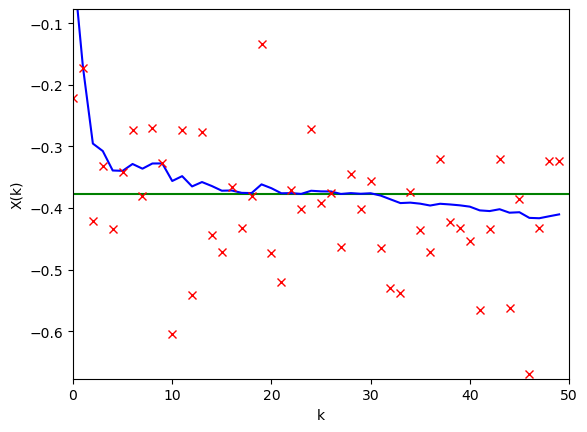

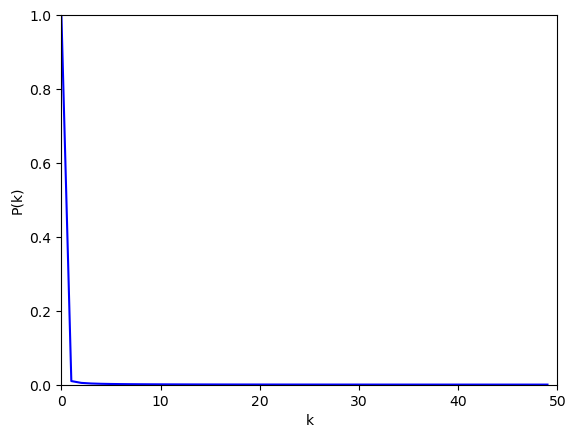

In [65]:

x = -0.37727 

q = 1e-5    
r = 0.01    

KF = cv2.KalmanFilter(1, 1, 0)             # B = 0
KF.transitionMatrix      = np.ones((1, 1)) # A = 1
KF.measurementMatrix     = np.ones((1, 1)) # H = 1
KF.processNoiseCov       = q * np.eye(1)   # Q
KF.measurementNoiseCov   = r * np.eye(1)   # R


KF.errorCovPost        = np.ones((1, 1))  # P0 = 1
KF.statePost           = np.zeros((1, 1)) # x0 = 0

N = 50
z = np.random.randn(N, 1)*np.sqrt(r) + x  # measurement
X = [KF.statePost[0,0]]        # initial value
P = [KF.errorCovPost[0,0]]     # initial errorCovPost

for k in range(1, N):
     predict = KF.predict() 
     estimate = KF.correct(z[k])
     X.append(estimate[0,0])        # KF.statePost[0,0]
     P.append(KF.errorCovPost[0,0])     
plt.figure(1)      
plt.xlabel('k')
plt.ylabel('X(k)')
plt.axis([0, N, x-3*np.sqrt(r), x+3*np.sqrt(r)])
plt.plot([0, N], [x, x], 'g-')  # the truth value line

plt.plot(X, 'b-')
plt.plot(z, 'rx')

plt.figure(2)      
plt.xlabel('k')
plt.ylabel('P(k)')
plt.axis([0, N, 0, 1.0])
plt.plot(P, 'b-')
plt.show()


In [66]:
def onMouse(event, x, y, flags, param):    
    if event == cv2.EVENT_LBUTTONDBLCLK:
        param[0][:,:] = 0  # clear image
    param[1][0] = x  # mouse point z
    param[1][1] = y
    

frame = np.zeros((512,512,3), np.uint8)
z = np.zeros((2,1), np.float32)  # measurement

cv2.namedWindow('Kalman Fliter')
cv2.setMouseCallback('Kalman Fliter',onMouse, [frame, z])


q = 1e-5   #  process noise covariance
r = 0.01   #  measurement noise covariance, r = 1 
KF = cv2.KalmanFilter(4,2,0)
KF.transitionMatrix = np.array([[1,0,1,0],         
                                [0,1,0,1],
                                [0,0,1,0],
                                [0,0,0,1]], np.float32)  # A
KF.measurementMatrix = np.array([[1,0,0,0],
                                 [0,1,0,0]],np.float32)  # H
KF.processNoiseCov       = q* np.eye(4, dtype=np.float32)   # Q 
KF.measurementNoiseCov = r* np.eye(2, dtype=np.float32)   # R

KF.errorCovPost  = np.eye(4, dtype=np.float32)       # P0 = I
KF.statePost     = np.zeros((4, 1), dtype=np.float32) # x0 = 0

last_z = z.copy()
last_estimate = KF.statePost.copy()

while True:
    predict  = KF.predict()
    estimate =KF.correct(z)
    
    x1, y1 = np.int0(last_z.flatten())
    x2, y2 = np.int0(z.flatten())
    cv2.line(frame, (x1, y1),(x2, y2), (0,0,255), 2 )
    
    x1, y1,_, _ = np.int0(last_estimate.flatten())
    x2, y2, _, _ = np.int0(estimate.flatten())
    cv2.line(frame, (x1, y1),(x2, y2), (255,0,0), 2 )
    cv2.imshow('Kalman Fliter',frame)
 
    last_z = z.copy()
    last_estimate = estimate.copy()
    
    key = cv2.waitKey(30)
    if key == 27: break
cv2.destroyAllWindows()


In [67]:
roi  = None
drag_start = None
mouse_status = 0
tracking_start  = False
def onMouse(event, x, y, flags, param=None):
     global roi
     global drag_start
     global mouse_status
     global tracking_start   
     if event == cv2.EVENT_LBUTTONDOWN:
          drag_start = (x, y)
          mouse_status = 1
          tracking_start = False
     elif event == cv2.EVENT_MOUSEMOVE:
          if flags == cv2.EVENT_FLAG_LBUTTON:
               xmin = min(x, drag_start[0])
               ymin = min(y, drag_start[1])
               xmax = max(x, drag_start[0])
               ymax = max(y, drag_start[1])
               roi = (xmin, ymin, xmax, ymax)
               mouse_status = 2 # dragging
     elif event == cv2.EVENT_LBUTTONUP:
          mouse_status = 3 # complete
        
cv2.namedWindow('tracking')
cv2.setMouseCallback('tracking', onMouse)

cap = cv2.VideoCapture('./data/ball.wmv')
if (not cap.isOpened()): 
     print('Error opening video')    
height, width = (int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
                 int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)))
roi_mask   = np.zeros((height, width), dtype=np.uint8)
term_crit = (cv2.TERM_CRITERIA_MAX_ITER+cv2.TERM_CRITERIA_EPS,10, 1)


q = 1e-5   
r = 0.01 
dt = 1
KF = cv2.KalmanFilter(4,2,0)
KF.transitionMatrix = np.array([[1,0,dt,0],         
                                [0,1,0,dt],
                                [0,0,1,0],
                                [0,0,0,1]], np.float32)  # A
KF.measurementMatrix = np.array([[1,0,0,0],
                                 [0,1,0,0]],np.float32)  # H

t = 0
while True:
     ret, frame = cap.read()
     if not ret: break
     t+=1
     print('t=',t)
     frame2 = frame.copy() # camShift
     hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
     mask = cv2.inRange(hsv,(0, 60, 32),(180,255,255))

     if mouse_status==2:
          x1, y1, x2, y2 = roi
          cv2.rectangle(frame, (x1, y1), (x2, y2), (255, 0, 0), 2)  
     if mouse_status==3:
          print('initialize....')
          mouse_status = 0
          x1, y1, x2, y2 = roi          
          mask_roi = mask[y1:y2, x1:x2]
          hsv_roi  =  hsv[y1:y2, x1:x2]
          
          hist_roi = cv2.calcHist([hsv_roi],[0],mask_roi,[16],[0,180])

          cv2.normalize(hist_roi,hist_roi,0,255,cv2.NORM_MINMAX)
          H1 = hist_roi.copy()
          cv2.normalize(H1,H1,0.0,1.0,cv2.NORM_MINMAX)          
          track_window = (x1, y1, x2-x1, y2-y1) # meanShift
          
#4-1: Kalman filter initialize    
          KF.processNoiseCov     = q* np.eye(4, dtype=np.float32) # Q        
          KF.measurementNoiseCov = r* np.eye(2, dtype=np.float32) # R
          KF.errorCovPost  = np.eye(4, dtype=np.float32)          # P0 = I

          x, y, w, h = track_window
          KF.statePost=np.array([[x],[y],[0.],[0.]],dtype=np.float32)
          tracking_start = True
               
     if tracking_start:
#4-2
          predict  = KF.predict()

#4-3: meanShift tracking
          backP = cv2.calcBackProject([hsv],[0],hist_roi,[0,180],1)
          backP &= mask
         
          ret, track_window = cv2.meanShift(backP, track_window, term_crit)
          x,y,w,h = track_window
          cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255),2)

#4-4: Kalman correct
          z = np.array([[x],[y]],dtype=np.float32) # measurement
          estimate = KF.correct(z)
          estimate = np.int0(estimate)
          
#4-5         
          x2, y2 = estimate[0][0], estimate[1][0]
          cv2.rectangle(frame, (x2,y2), (x2+w,y2+h), (255,0,0),2)
##          track_window = x2, y2, w, h
          
     cv2.imshow('tracking',frame)
     key = cv2.waitKey(25)
     if key == 27:
          break
if cap.isOpened():
     cap.release()
cv2.destroyAllWindows()


t= 1
t= 2
t= 3
t= 4
t= 5
t= 6
t= 7
t= 8


In [67]:
src1 = cv2.imread('./data/book3.jpg')
img1= cv2.cvtColor(src1,cv2.COLOR_BGR2GRAY)

F = cv2.SIFT_create()
kp1, des1 = F.detectAndCompute(img1, None) 
flan = cv2.FlannBasedMatcher_create()


cap = cv2.VideoCapture('./data/book3.mp4')
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print("frame_size =", frame_size)


nndrRatio = 0.45  
h, w = img1.shape
t = 0
while True:    
    retval, frame = cap.read() # 프레임 획득
    if not retval: break
    t+=1

    src2 = frame.copy()
    img2= cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
    kp2, des2 = F.detectAndCompute(img2, None)
    matches = flan.knnMatch(np.float32(des1), np.float32(des2), k=2)

    good_matches = [f1 for f1, f2 in matches
                       if f1.distance < nndrRatio*f2.distance]
    dst = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,
                           flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
    if len(good_matches) < 5:
        print('sorry, too small good matches', len(good_matches))
        cv2.imshow('dst',  dst)
        key = cv2.waitKey(50)
        if key == 27: break
        continue
        
    src1_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches])
    src2_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches])
    H, mask=cv2.findHomography(src1_pts,src2_pts, cv2.RANSAC, 2.0)
    mask_matches = mask.ravel().tolist() # list(mask.flatten())

    if H is None:
        print('sorry, no H')
        continue   
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    pts2 = cv2.perspectiveTransform(pts, H)
    src2 = cv2.polylines(src2,[np.int32(pts2)],True,(255,0, 0),2)
            
    draw_params = dict(matchColor = (0,255,0),
                       singlePointColor = None,
                       matchesMask = mask_matches, flags = 2)                 
    dst = cv2.drawMatches(src1,kp1,src2,kp2, good_matches, None,**draw_params)
    cv2.imshow('dst',  dst)
        
    key = cv2.waitKey(25)
    if key == 27: # Esc
        break
cap.release()
cv2.destroyAllWindows()


frame_size = (640, 480)
